In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X,y = mnist.data, mnist.target

In [3]:
X.shape

(70000, 784)

In [4]:
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

In [7]:
instance_reshaped = X[0].reshape(28,28)

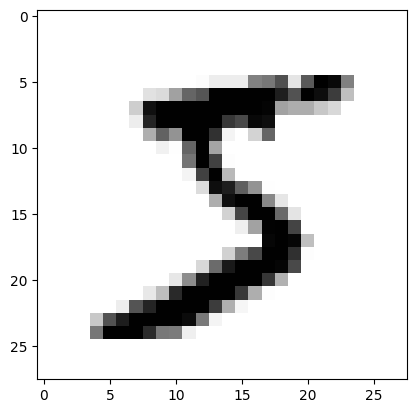

In [8]:
import matplotlib.pyplot as plt
plt.imshow(instance_reshaped, cmap="binary")
plt.show()

In [9]:
y[0]

'5'

In [10]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
x_train.shape

(60000, 784)

In [12]:
x_test.shape

(10000, 784)

In [13]:
y_test.shape

(10000,)

In [14]:
y_train_5 = y_train=="5"

In [15]:
y_test_5 = y_test=="5"

In [16]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
some_digit=X[0].reshape(1, -1) #1d arrayi 2d ve 1 sample haline getirdi.
print(some_digit.shape)
sgd_clf.predict(some_digit)

(1, 784)


array([ True])

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [21]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)
dummy_clf.predict(x_train)


array([False, False, False, ..., False, False, False])

In [22]:
print(any(dummy_clf.predict(x_train)))

False


In [23]:
cross_val_score(dummy_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [24]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)


In [25]:
y_train_pred.shape #3 tane olması gerekmiyor mu?

(60000,)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [27]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [28]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [29]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [30]:
y_score = sgd_clf.decision_function(some_digit)#some_digiti reshape yapmadan [] içine alarak da yapabilirsin
y_score

array([2164.22030239])

In [31]:
threshold = 0
y_some_digit_prediction = y_score>threshold
y_some_digit_prediction

array([ True])

In [32]:
threshold=3000
y_some_digit_prediction = y_score>threshold
y_some_digit_prediction

array([False])

In [33]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")

In [34]:
print(y_scores)
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


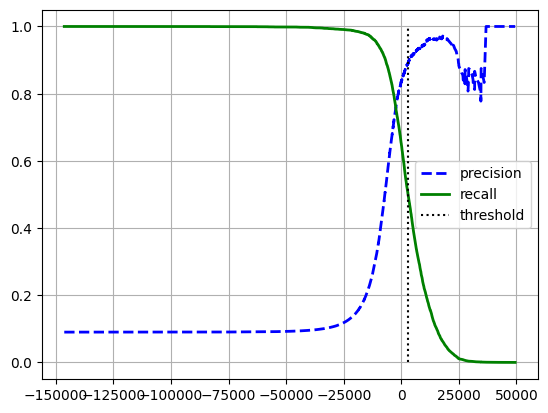

In [35]:
plt.plot(thresholds, precisions[:-1], "b--", label="precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.grid()
plt.legend()
plt.show()

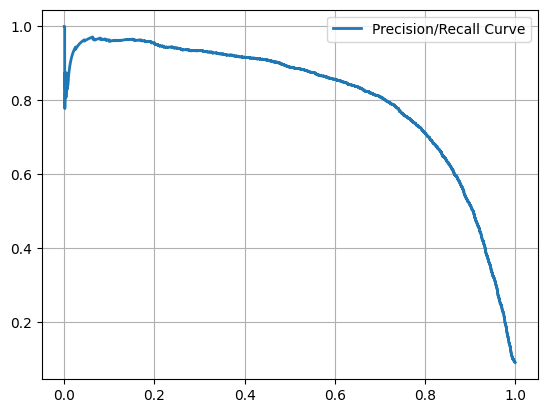

In [36]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall Curve")
plt.grid()
plt.legend()
plt.show()

In [37]:
idx_for_90_precision = (precisions>=0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [38]:
y_train_pred_90 = y_scores>=threshold_for_90_precision
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [39]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [40]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [41]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [42]:
idx_for_90_precision = (thresholds<=threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_90_precision], fpr[idx_for_90_precision]

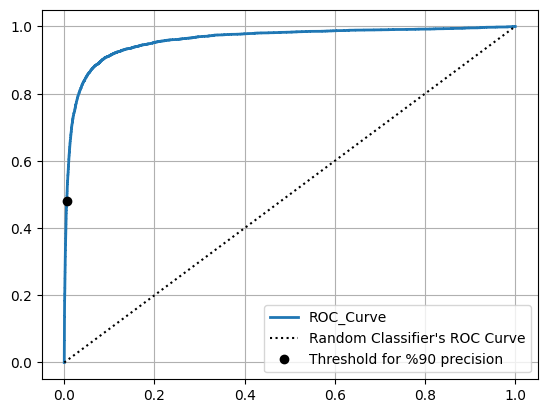

In [43]:
plt.plot(fpr, tpr, linewidth=2, label="ROC_Curve")
plt.plot([0,1], [0,1], "k:", label="Random Classifier's ROC Curve")
plt.plot([fpr_90], [tpr_90], "ko",label="Threshold for %90 precision")
plt.grid()
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [45]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [46]:
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method="predict_proba")

In [47]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [48]:
y_scores_forest = y_probas_forest[:,1]
precision_forest, recall_forest, threshold_forest = precision_recall_curve(y_train_5, y_scores_forest)

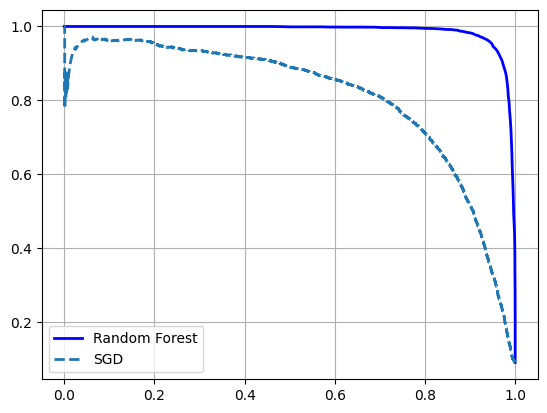

In [49]:
plt.plot(recall_forest, precision_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.legend()
plt.grid()
plt.show()

In [50]:
y_train_pred_forest = y_probas_forest[:,1]>=0.5

In [51]:
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [52]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [53]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [54]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

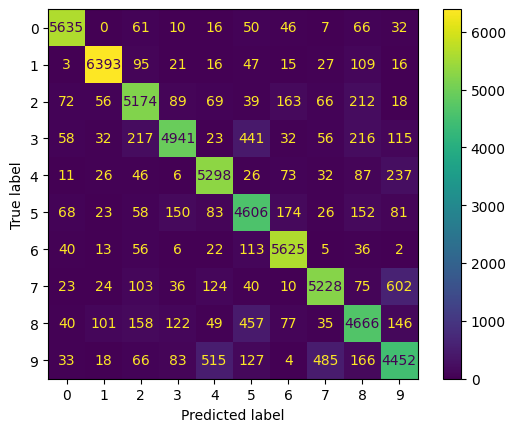

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

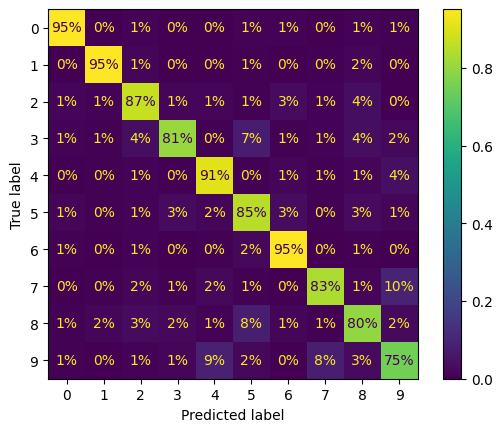

In [56]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

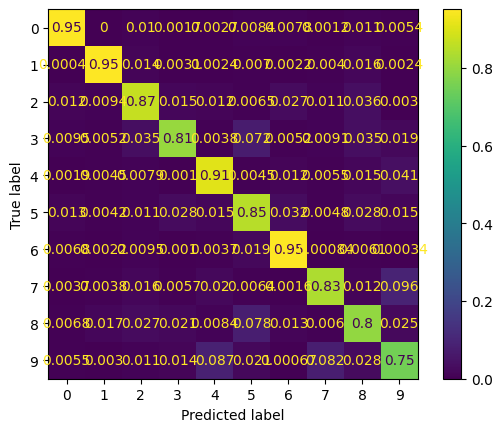

In [57]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true")
plt.show()

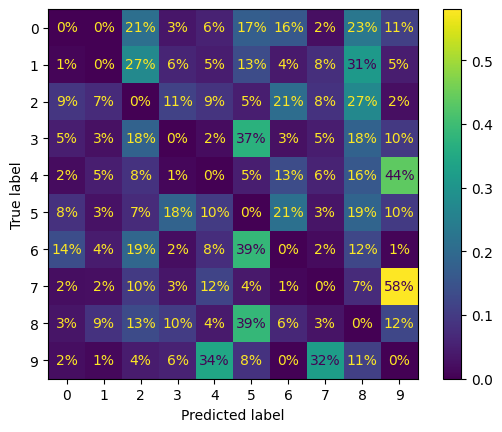

In [58]:
sample_weights = y_train_pred != y_train
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weights, normalize="true", values_format=".0%")
plt.show()

In [59]:
sample_weights

array([False, False, False, ..., False, False, False])

In [60]:
cl_a, cl_b = "3", "5"
x_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
x_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
x_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
x_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]
x_aa.shape

(4941, 784)

In [61]:
import numpy
x_aa = [x.reshape(28,28) for x in x_aa]
print(x_aa[1].shape)

(28, 28)


In [62]:
for digit in x_aa:
  print(digit.shape)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(

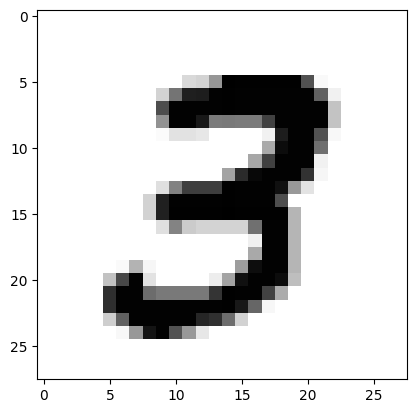

In [63]:
plt.imshow(x_aa[0], cmap="binary")

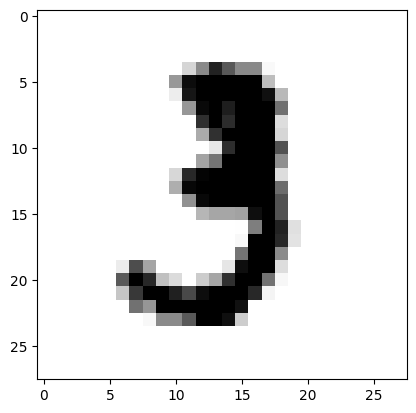

In [64]:
plt.imshow(x_aa[1], cmap="binary")

In [65]:
import numpy as np
np.random.seed(42)
random_noise = np.random.randint(0, 100, (len(x_train), 784))

In [66]:
x_train_mod = x_train + random_noise
noise = np.random.randint(0,100, (len(x_test), 784))
x_test_mod = x_test + noise

In [67]:
y_train_mod = x_train
y_test_mod = x_test

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_mod, y_train_mod)


KNeighborsClassifier()

In [69]:
x_test_mod[0].shape

(784,)

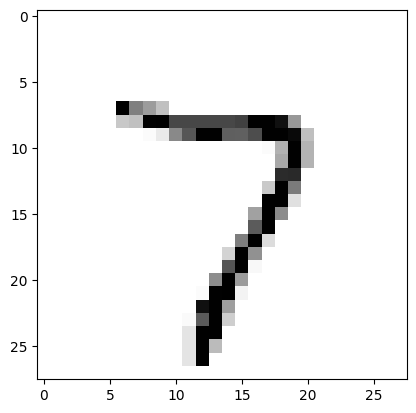

In [70]:
clean_digit = knn_clf.predict([x_test_mod[0]])
clean_digit = clean_digit.reshape(28,28)
plt.imshow(clean_digit, cmap="binary")
plt.show()